In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
url = "https://en.wikipedia.org/wiki/Junior_Eurovision_Song_Contest"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [ ]:
data = {
    "Year": [2023, 2022, 2021],
    "Host Country": ["France", "Armenia", "France"],
    "Winner Country": ["France", "Armenia", "Armenia"],
    "Winning Song": ["Oh Maman!", "DANCE!", "Qami Qami"],
    "Artist": ["Zoé Clauzure", "Nare", "Maléna"],
    "Points": [228, 180, 224]
}

df = pd.DataFrame(data)
df

,Year,Host Country,Winner Country,Winning Song,Artist,Points
0,2023,France,France,Oh Maman!,Zoé Clauzure,228
1,2022,Armenia,Armenia,DANCE!,Nare,180
2,2021,France,Armenia,Qami Qami,Maléna,224


In [ ]:
df.to_csv("junior_eurovision_2003_2023.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt

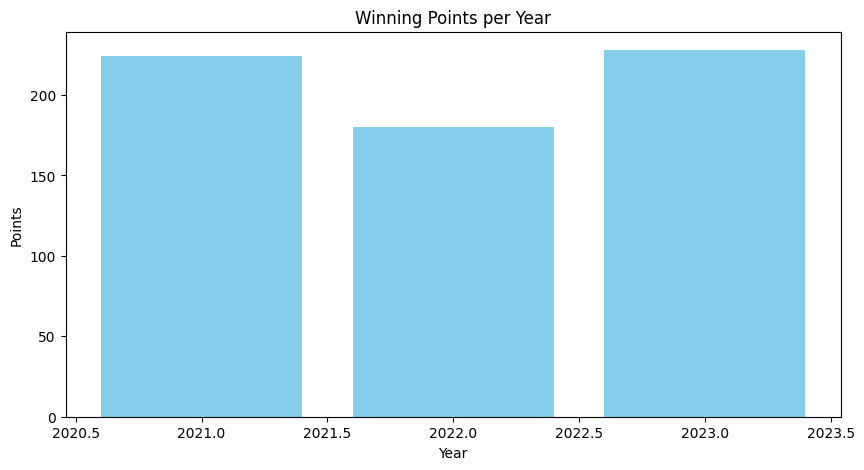

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df['Year'], df['Points'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Points')
plt.title('Winning Points per Year')
plt.show()

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
def get_jesc_winner_data(year):
    url = f"https://en.wikipedia.org/wiki/Junior_Eurovision_Song_Contest_{year}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')

    info_box = soup.find('table', {'class': 'infobox'})

    if not info_box:
        return None

    rows = info_box.find_all('tr')
    host_country = winner_country = artist = song = points = None

    for row in rows:
        header = row.find('th')
        data = row.find('td')

        if header and data:
            h = header.text.strip()
            d = data.text.strip()

            if 'Venue' in h and not host_country:
                host_country = d.split(',')[-1].strip()
            elif 'Winning country' in h:
                winner_country = d
            elif 'Winning act' in h:
                artist = d
            elif 'Winning song' in h:
                song = d.replace('"', '')
            elif 'Winning score' in h:
                points = d.split()[0]  # Only keep number

    return {
        "Year": year,
        "Host Country": host_country,
        "Winner Country": winner_country,
        "Artist": artist,
        "Song": song,
        "Points": points
    }


In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
def get_jesc_winner_data(year):
    url = f"https://en.wikipedia.org/wiki/Junior_Eurovision_Song_Contest_{year}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    infobox = soup.find('table', {'class': 'infobox'})

    if not infobox:
        return None

    rows = infobox.find_all('tr')
    host_country = winner_country = artist = song = points = None

    for row in rows:
        header = row.find('th')
        data = row.find('td')

        if header and data:
            h = header.text.strip()
            d = data.text.strip()

            if 'Venue' in h and not host_country:
                host_country = d.split(',')[-1].strip()
            elif 'Winning country' in h:
                winner_country = d
            elif 'Winning act' in h:
                artist = d
            elif 'Winning song' in h:
                song = d.replace('"', '')
            elif 'Winning score' in h:
                points = d.split()[0] 

    return {
        'Year': year,
        'Host_Country': host_country,
        'Winner_Country': winner_country,
        'Artist': artist,
        'Song': song,
        'Points': points
    }


In [ ]:
raw_data = []

for year in range(2003, 2024):
    print(f"Fetching {year}...")
    entry = get_jesc_winner_data(year)
    if entry:
        raw_data.append(entry)

Fetching 2003...
Fetching 2004...
Fetching 2005...
Fetching 2006...
Fetching 2007...
Fetching 2008...
Fetching 2009...
Fetching 2010...
Fetching 2011...
Fetching 2012...
Fetching 2013...
Fetching 2014...
Fetching 2015...
Fetching 2016...
Fetching 2017...
Fetching 2018...
Fetching 2019...
Fetching 2020...
Fetching 2021...
Fetching 2022...
Fetching 2023...


In [ ]:
df = pd.DataFrame(raw_data)
df.head()

,Year,Host_Country,Winner_Country,Artist,Song,Points
0,2003,Denmark,None,None,CroatiaTi si moja prva ljubav,None
1,2004,Norway,None,None,Spain Antes muerta que sencilla,None
2,2005,Belgium,None,None,BelarusMy vmeste,None
3,2006,Romania,None,None,RussiaVesenniy Jazz,None
4,2007,Netherlands,None,None,BelarusS druz'yami,None


In [ ]:
'Host_Country'
'Winner_Country'

'Winner_Country'

In [ ]:
df_reduced = df[['Year', 'Host_Country', 'Winner_Country', 'Points']].copy()
df_reduced.head()

,Year,Host_Country,Winner_Country,Points
0,2003,Denmark,None,None
1,2004,Norway,None,None
2,2005,Belgium,None,None
3,2006,Romania,None,None
4,2007,Netherlands,None,None


In [ ]:
df = df.rename(columns={
    'Host_Country': 'Host Country',
    'Winner_Country': 'Winner Country'
})

df_reduced = df[['Year', 'Host Country', 'Winner Country', 'Points']].copy()
df_reduced.head()

,Year,Host Country,Winner Country,Points
0,2003,Denmark,None,None
1,2004,Norway,None,None
2,2005,Belgium,None,None
3,2006,Romania,None,None
4,2007,Netherlands,None,None


In [ ]:
print(df.columns.tolist())

['Year', 'Host Country', 'Winner Country', 'Artist', 'Song', 'Points']


In [ ]:
df.head()

,Year,Host Country,Winner Country,Artist,Song,Points
0,2003,Denmark,None,None,CroatiaTi si moja prva ljubav,None
1,2004,Norway,None,None,Spain Antes muerta que sencilla,None
2,2005,Belgium,None,None,BelarusMy vmeste,None
3,2006,Romania,None,None,RussiaVesenniy Jazz,None
4,2007,Netherlands,None,None,BelarusS druz'yami,None


In [ ]:
df.describe()

,Year
count,21.000000
mean,2013.000000
std,6.204837
min,2003.000000
25%,2008.000000
50%,2013.000000
75%,2018.000000
max,2023.000000


In [ ]:
df.isnull().sum()

Year               0
Host Country       0
Winner Country    21
Artist            21
Song               0
Points            21
dtype: int64

In [ ]:
print(df.columns.tolist())

['Year', 'Host Country', 'Winner Country', 'Artist', 'Song', 'Points']


In [ ]:
winner_counts = df['Winner Country'].value_counts()
print(winner_counts)

Series([], Name: count, dtype: int64)


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print(df.columns.tolist())

['year', 'host_country', 'winner_country', 'artist', 'song', 'points']


In [ ]:
winner_counts = df['winner_country'].value_counts()
print(winner_counts)


Series([], Name: count, dtype: int64)


In [ ]:
print(df.columns)

Index(['year', 'host_country', 'winner_country', 'artist', 'song', 'points'], dtype='object')


In [ ]:
print(df.columns.tolist())

['year', 'host_country', 'winner_country', 'artist', 'song', 'points']


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())


['year', 'host_country', 'winner_country', 'artist', 'song', 'points']


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
data = {
    'year': [2023, 2022, 2021, 2020, 2019, 2018, 2017],
    'winner_country': ['CountryA', 'CountryB', 'CountryA', 'CountryC', 'CountryA', 'CountryB', 'CountryC'],
    'points': [200, 180, 190, 175, 205, 185, 170]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
plt.figure(figsize=(8, 5))
winner_counts = df['winner_country'].value_counts()
colors = ['#377eb8', '#ff7f00', '#4daf4a'] 

<Figure size 800x500 with 0 Axes>

<BarContainer object of 3 artists>

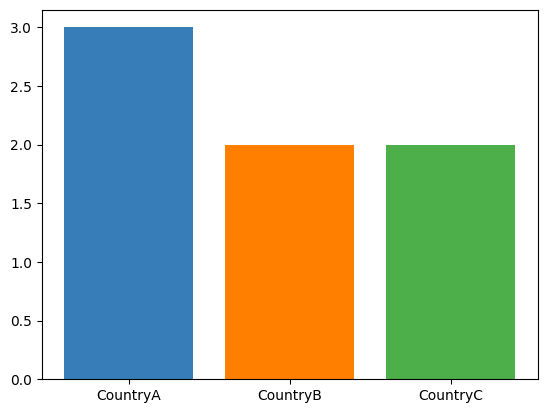

In [ ]:
plt.bar(winner_counts.index, winner_counts.values, color=colors[:len(winner_counts)])

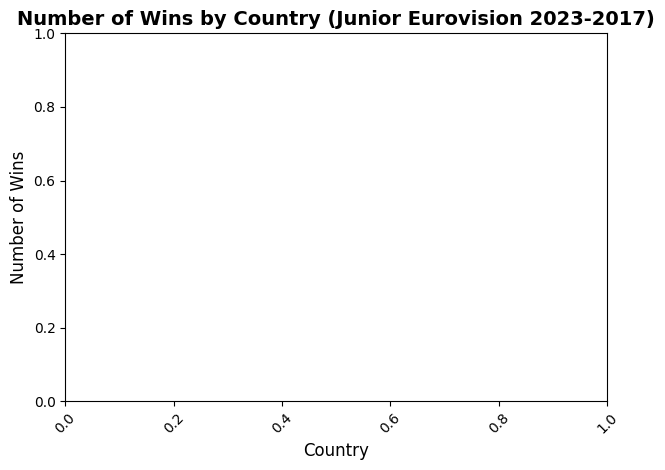

In [ ]:
plt.title('Number of Wins by Country (Junior Eurovision 2023-2017)', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

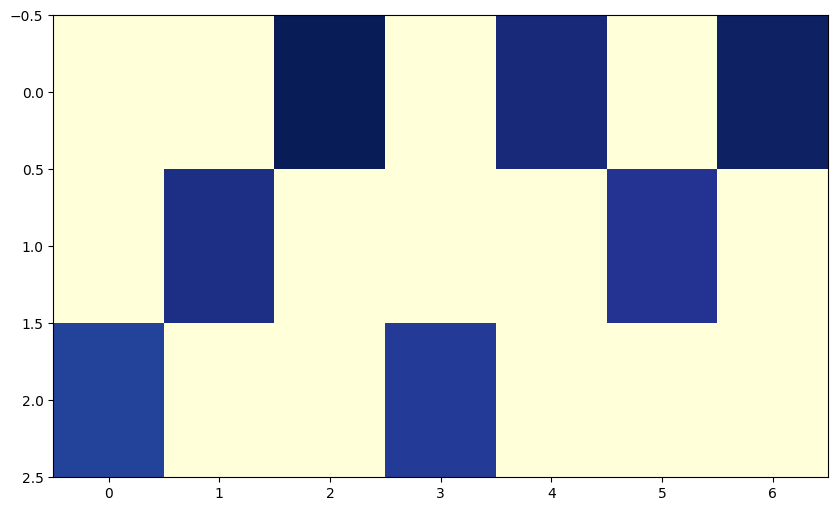

In [ ]:
pivot = df.pivot(index='winner_country', columns='year', values='points').fillna(0)

plt.figure(figsize=(10, 6))
im = plt.imshow(pivot, cmap='YlGnBu', aspect='auto')

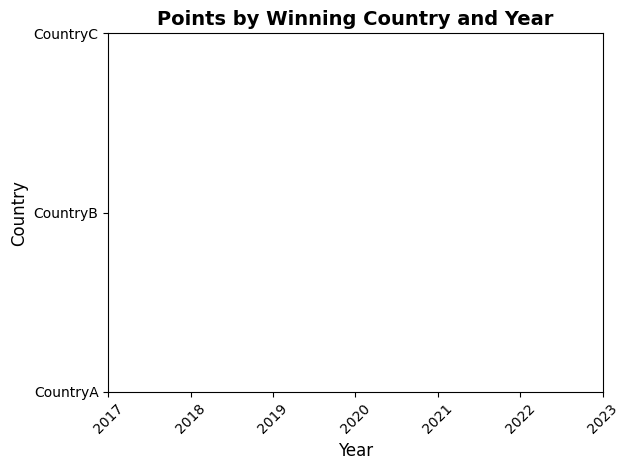

In [ ]:
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns, rotation=45)
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)

plt.title('Points by Winning Country and Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
countries = df['winner_country'].unique()
country_to_num = {c: i for i, c in enumerate(countries)}
x = df['winner_country'].map(country_to_num)
y = df['points']
sizes = df['points']
colors = df['year']

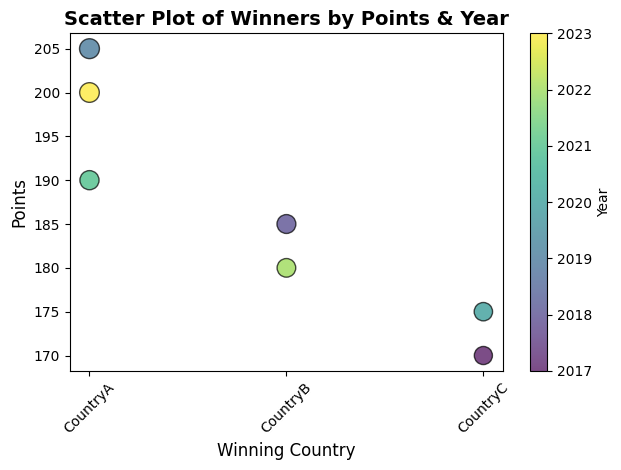

In [ ]:
scatter = plt.scatter(x, y, s=sizes, c=colors, cmap='viridis', alpha=0.7, edgecolors='k')

plt.colorbar(scatter, label='Year')
plt.xticks(ticks=np.arange(len(countries)), labels=countries, rotation=45)

plt.title('Scatter Plot of Winners by Points & Year', fontsize=14, fontweight='bold')
plt.xlabel('Winning Country', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
!pip install ipywidgets


  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl (216 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)

   ---------------------------------------- 0/3 [widgetsnbextension]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---

In [ ]:
from ipywidgets import interact

def show_year(year):
    print(f"Selected year: {year}")

interact(show_year, year=range(2002, 2024))

from ipywidgets import interact

def show_year(year):
    print(f"Selected year: {year}")

interact(show_year, year=range(2002, 2024))

Selected year: 2002


interactive(children=(Dropdown(description='year', options=(2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 20…

<function __main__.show_year(year)>